#<b>Transformer Tripping causes</b>

###<b>Introduction</b>
<p>This project is for prediction of tripping causes of transformer. We have researched on the necessary variables on which the transformer works and its ranges for normal funtioning. If a transformer is out of range for these variables then the transformer trips.</p>
<p>Before we get into the explanation of variables and its ranges in data section let us give you a brief description of what is a transformer.</p>

###<b>Transformers:</b>
<p>A transformer is a passive component that transfers electrical energy from one electrical circuit to another circuit, or multiple circuits. A varying current in any one coil of the transformer produces a varying magnetic flux in the transformer’s core, which induces a varying electromotive force across any other coils wound around the same core. Electrical energy can be transferred
between separate coils without a metallic (conductive) connection between the two circuits. Faraday’s law of induction, discovered in 1831, describes the induced voltage effect in any coil due to a changing magnetic flux encircled by the coil.</p>
<p>Transformers are most commonly used for increasing low AC voltages at high current (a step-up transformer) or decreasing high AC voltages at low current (a step-down transformer) in electric power applications, and for coupling the stages of signal-processing circuits. Transformers can also be used for isolation, where the voltage in equals the voltage out, with separate coils not
electrically bonded to one another. Since the invention of the first constant-potential transformer in 1885, transformers have become essential for the transmission, distribution, and utilization of alternating current electric power. A wide range of transformer designs is encountered in electronic and electric power applications. Transformers range in size from RF transformers less than a cubic centimeter in volume, to units weighing hundreds of tons used to interconnect the power grid.</p>


###<b>Data Section</b>
<li><b>Input voltage volt:</b> measured in volt, input supply in residential areas is 220V, trips above 230V. fluctuations in supply voltage upto plus 12.5%.</li>
<li><b>Age:</b> The average age of transformers are about 25 after that they starts misbehaving like oil leakage maximum flux loss, lowers resistance to heat etc.</li>
<li><b>Oil temperature (‘C):</b> maximum permissible temperature is 105’C.</li>
<li><b>Winding temperature:</b> maximum permissible temperature is 105’C. Winding temperature is a crucial parameter that should be monitored in large distribution transformers and power transformers. Accurate and stable measurement by maintenance-free thermometers provides insight into the overall performance of the transformer, while avoiding thermal degradation and ensuring
a longer operating life.</li>
<li><b>Ambient temperature:</b> average temperature is 32-40’C and can tolerate upto 50’C. Ambient temperature is the air temperature of an environment or object. In computing, ambient temperature refers to the air temperature surrounding computing equipment.</li>
<li><b>Over loading:</b> for 110KV/220V rating transformer it can tolerate upto 288.67 amps of loads. Normal load in a house (excluding AC) is about 2 KV</li>
<li><b>Bushing/winding HV:</b> 120mm with tolerance -5% to +10%</li>
<li><b>Bushing/winding LV:</b> 20mm with tolerance -2.5% to +5%</li>
<li><b>Moisture content:</b> The water content in oil is allowed up to 50 ppm as recommended by IS–335(1993). The accurate measurement of water content at such low levels requires very sophisticated instrument like Coulometric Karl Fisher Titrator.
<li><b>Oil level:</b> should be 90% at loading of 70% of transformer.</li>
<li><b>Core flux density:</b> For transformers upto 132 kV , Flux density is 1.55 in Tesla. Distribution transformers, the value of flux density upto 1.7 Wb/m2 is permitted ( weber per square metre OR tesla)</li>
<li><b>Climatic factor:</b> climatic factor includes lightening, thunder, storm or accidents.</li>
<li><b>Tripping cause:</b> assume 75% of total cases transformer had tripped.</li>

###<b>Methodology</b>
<li>Importing data set</li>
<li>Exploratory Data analysis and visualization</li>
<li>Modelling - train_test_split, Standard Scaling, Support Vector Machines, Decision tree, Bagging, Random Forest, Gradient Boosting, Voting Classifier, Random forest with ntree=100, Finding tripping cause for unknown dataset</li>
<li>Results</li>
<li>Conclusion</li>

###<b>Importing Data set</b>

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#reading csv file from local computer
from google.colab import files
uploaded = files.upload()

Saving finalizedData.csv to finalizedData.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['finalizedData.csv']))

In [4]:
#use pd.set_option('display.max_columns',13) if all columns are not displayed
df = df.drop(['tripping'],axis=1)
df.head()

input_voltage_volt  age  ...  oil_level_percentage  tripping_cause
0                 208   16  ...                    87              no
1                 197   17  ...                    76    tank failure
2                 196    9  ...                    98              no
3                 204    7  ...                    80              no
4                 205   13  ...                    82    core failure

[5 rows x 13 columns]

###<b>Exploratory Data Analysis

In [5]:
print('Shape of data set:',df.shape)
print('Data types of each feature:',df.dtypes)

Shape of data set: (5000, 13)
Data types of each feature: input_voltage_volt        int64
age                       int64
oil_temp_celcius        float64
winding_temp_celcius    float64
ambient_temp_celcius    float64
overloading             float64
bushing_HV_mm           float64
bushing_LV_mm           float64
moisture_level          float64
core_heating_tesla      float64
climatic_factor          object
oil_level_percentage      int64
tripping_cause           object
dtype: object


In [6]:
df.describe()

input_voltage_volt  ...  oil_level_percentage
count         5000.000000  ...           5000.000000
mean           211.887800  ...             79.754200
std             17.063922  ...             12.363088
min            178.000000  ...             39.000000
25%            201.000000  ...             74.000000
50%            209.000000  ...             81.000000
75%            216.000000  ...             89.000000
max            281.000000  ...            100.000000

[8 rows x 11 columns]

###<b>Data Visualization</b>

In [7]:
df_plot = df.iloc[:,[0,1,2,3,4,5,6,7,8,9,11]]
df_plot.head()

input_voltage_volt  age  ...  core_heating_tesla  oil_level_percentage
0                 208   16  ...                1.57                    87
1                 197   17  ...                1.39                    76
2                 196    9  ...                1.47                    98
3                 204    7  ...                1.21                    80
4                 205   13  ...                2.25                    82

[5 rows x 11 columns]

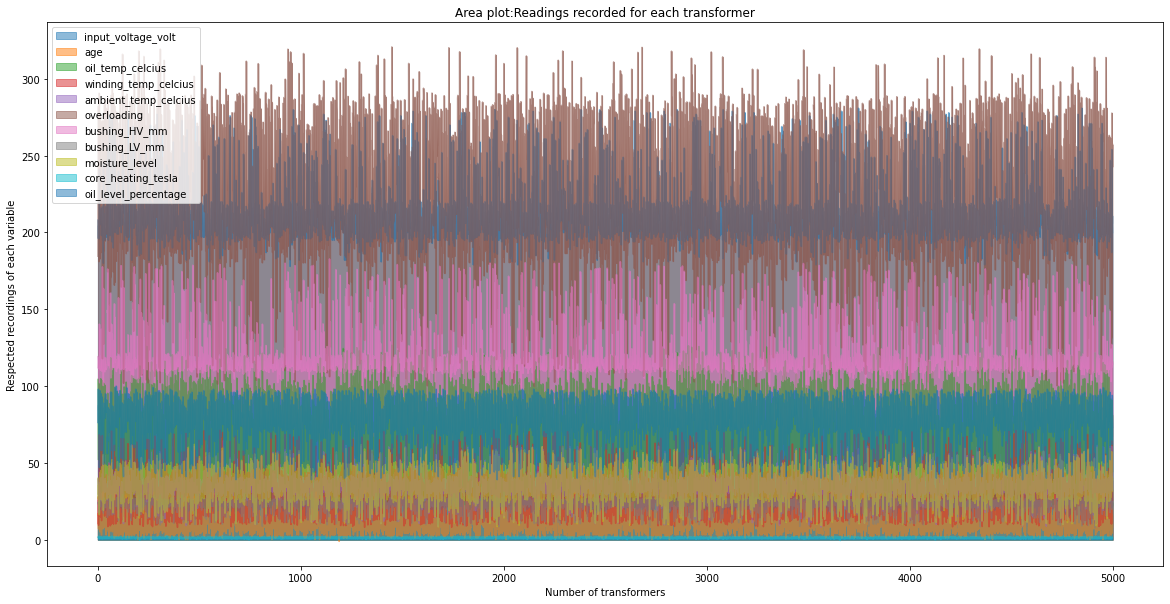

In [8]:
#Area plot
df_plot.plot(kind='area',
             stacked=False,
             figsize=(20, 10), # pass a tuple (x, y) size
             )
plt.xlabel('Number of transformers')
plt.ylabel('Respected recordings of each variable')
plt.title('Area plot:Readings recorded for each transformer')
plt.show()

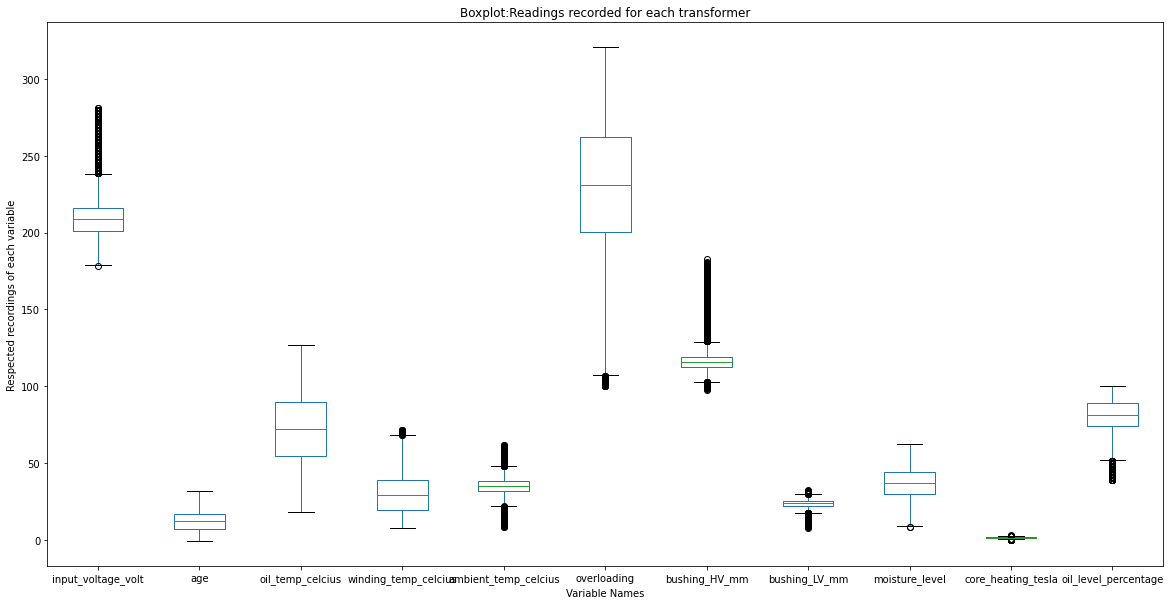

In [10]:
#Boxplot
df_plot.plot(kind='box',
             stacked=False,
             figsize=(20, 10), # pass a tuple (x, y) size
             )
plt.xlabel('Variable Names')
plt.ylabel('Respected recordings of each variable')
plt.title('Boxplot:Readings recorded for each transformer')
plt.show()

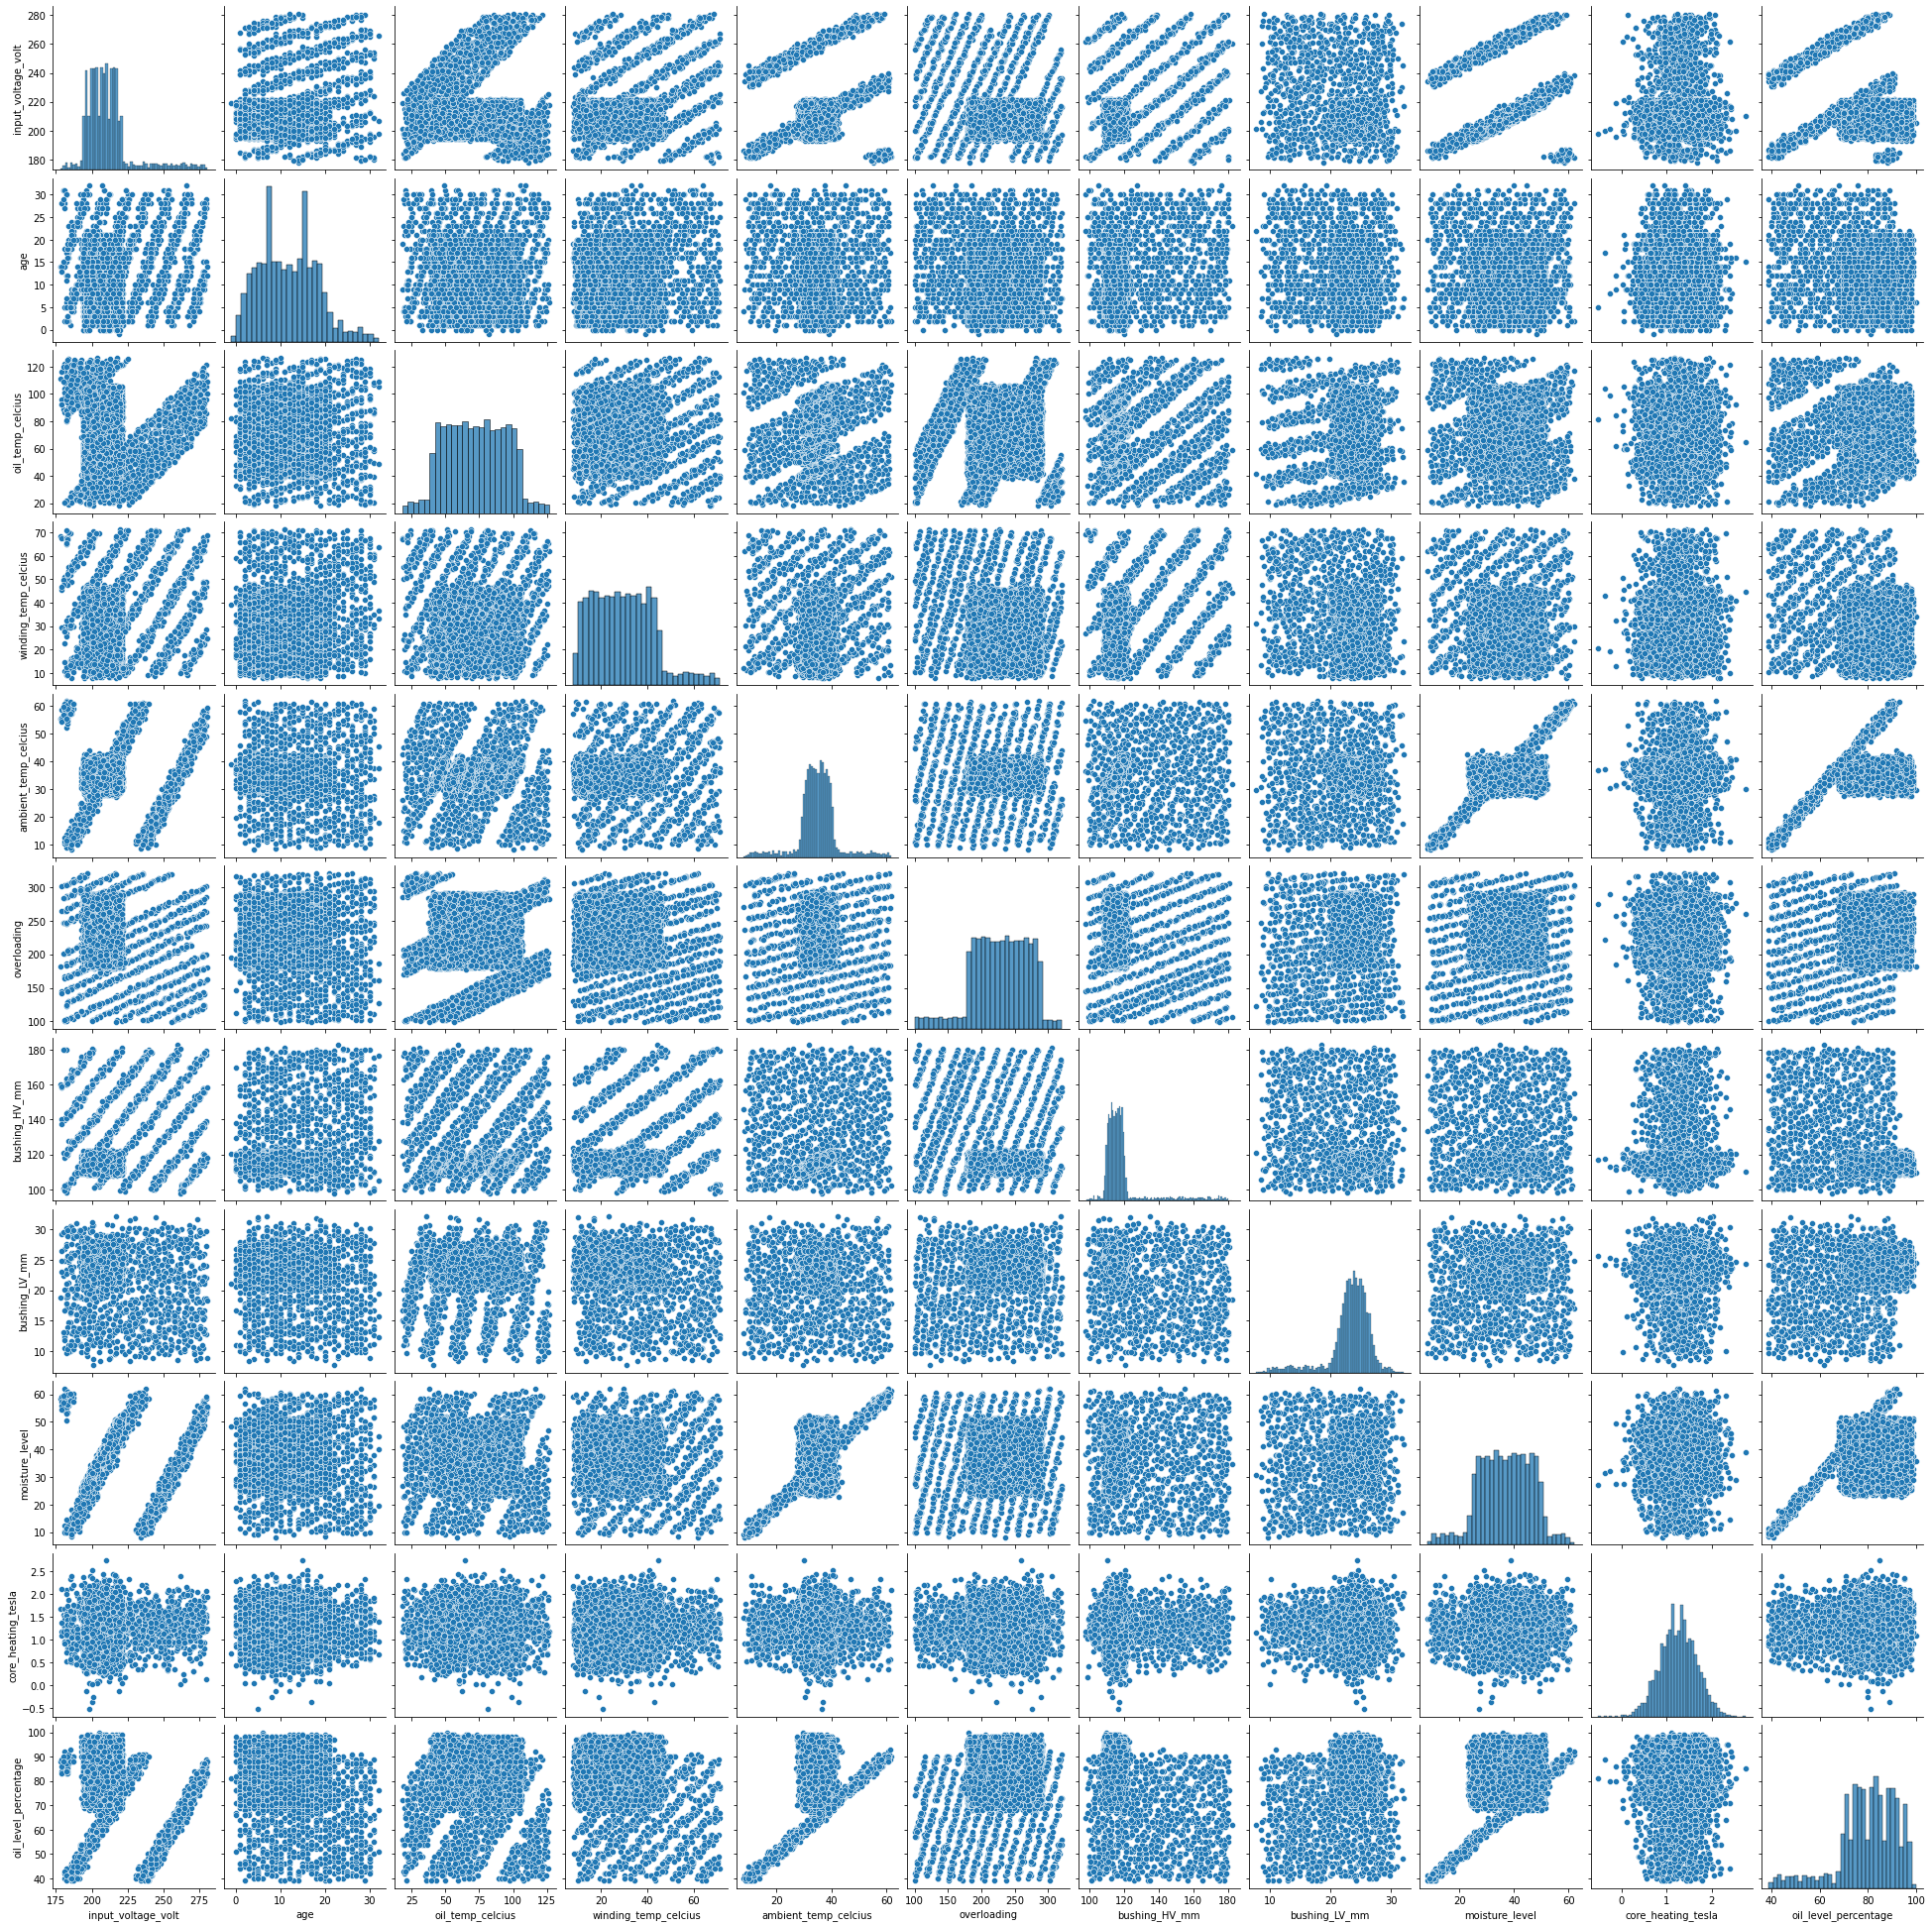

In [11]:
import seaborn as sns
sns.pairplot(df)

In [12]:
#correlation values
df.corr()

input_voltage_volt  ...  oil_level_percentage
input_voltage_volt              1.000000  ...             -0.219540
age                             0.159145  ...             -0.186577
oil_temp_celcius                0.003868  ...             -0.005395
winding_temp_celcius            0.202852  ...             -0.207014
ambient_temp_celcius            0.158065  ...              0.492485
overloading                    -0.173079  ...              0.194389
bushing_HV_mm                   0.366327  ...             -0.396176
bushing_LV_mm                  -0.250201  ...              0.282139
moisture_level                  0.342092  ...              0.438857
core_heating_tesla              0.011035  ...             -0.001071
oil_level_percentage           -0.219540  ...              1.000000

[11 rows x 11 columns]

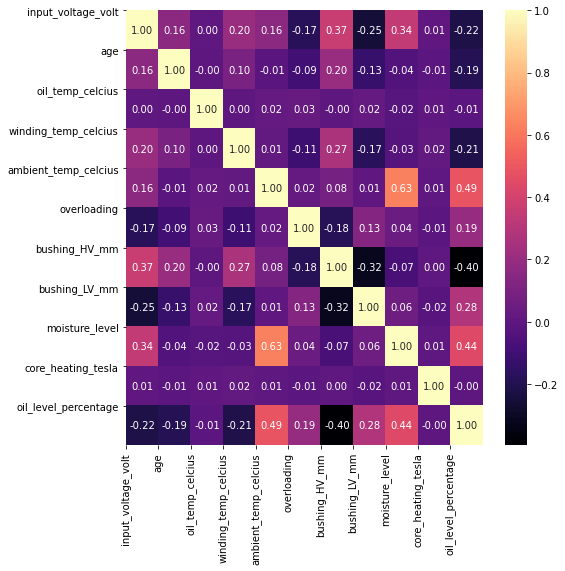

In [13]:
#Lets check the correlation on heatmap
import seaborn as sns
# Check Correlation amoung parameters
corr = df.corr()
fig, ax = plt.subplots(figsize=(8,8))
# Generate a heatmap
sns.heatmap(corr, cmap = 'magma', annot = True, fmt = ".2f")
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

<b>Note:</b> <p>Here you have to check if the data has missing/null values and decide if you want to delete the rows/columns or replace it with either mean or median values,but because I have worked on this data before I know there are no missing values.So lets go ahead.</p>


We need to create dummy variables for the categorical columns.

In [14]:
# Do the one hot encoding
df1 = pd.get_dummies(df["climatic_factor"])

In [15]:
df1.head(3)

no  yes
0   1    0
1   1    0
2   1    0

In [16]:
#change column names for clarity
df1.rename(columns={'no':'climatic_factor_no', 'yes':'climatic_factor_yes'}, inplace=True)
df1.head()

climatic_factor_no  climatic_factor_yes
0                   1                    0
1                   1                    0
2                   1                    0
3                   1                    0
4                   1                    0

In [17]:
# merge data frame "df" and "df1"
df = pd.concat([df, df1], axis=1)
# drop original column "climmatic_factor" from "df"
df.drop("climatic_factor", axis = 1, inplace=True)
df.head()

input_voltage_volt  age  ...  climatic_factor_no  climatic_factor_yes
0                 208   16  ...                   1                    0
1                 197   17  ...                   1                    0
2                 196    9  ...                   1                    0
3                 204    7  ...                   1                    0
4                 205   13  ...                   1                    0

[5 rows x 14 columns]

In [18]:
df["tripping_cause"].value_counts()

no                        1633
tank failure              1112
insulation degradation     611
bushing failure            571
core failure               472
climatic condition         343
overloading                126
winding failure             76
exess moisture              31
Tap Changer Failure         25
Name: tripping_cause, dtype: int64

###<b>Modelling</b>

Firstly, Splitting the data into training and testing set.

In [19]:
from sklearn.model_selection import train_test_split
X = df.drop(['tripping_cause'], axis=1)
Y = df["tripping_cause"]
print('Shape of X:', X.shape)
print('Shape of Y:', Y.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)
print('Training set shape:',X_train.shape,Y_train.shape)
print('Testing set shape:', X_test.shape, Y_test.shape)

Shape of X: (5000, 13)
Shape of Y: (5000,)
Training set shape: (4000, 13) (4000,)
Testing set shape: (1000, 13) (1000,)


In [21]:
#Value counts for target variable in both train and test
Y_test.value_counts()

no                        320
tank failure              220
insulation degradation    124
bushing failure           113
core failure              101
climatic condition         68
overloading                27
winding failure            17
exess moisture              5
Tap Changer Failure         5
Name: tripping_cause, dtype: int64

In [22]:
Y_train.value_counts()

no                        1313
tank failure               892
insulation degradation     487
bushing failure            458
core failure               371
climatic condition         275
overloading                 99
winding failure             59
exess moisture              26
Tap Changer Failure         20
Name: tripping_cause, dtype: int64

In real time, in order to be precise in your classification its better to add unstable data with more data to make it stable with each cause.

Data needs to be scaled before using SVM/knn as these are distance based models where as for tree based we dont need to standardize the data and can use unscaled data.

In [25]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_s = ss.fit_transform(X_train)
X_test_s = ss.fit_transform(X_test)
print('Scaled set shape:', X_train_s.shape)
print('Scaled set shape:', X_test_s.shape)

Scaled set shape: (4000, 13)
Scaled set shape: (1000, 13)


####<b> Support Vector Machines</b>

In [26]:
from sklearn.svm import SVC
svcm = SVC(kernel='rbf')
svcm.fit(X_train_s,Y_train)
y_predsvc = svcm.predict(X_test_s)
print(y_predsvc[0:10])

['tank failure' 'no' 'climatic condition' 'tank failure'
 'climatic condition' 'tank failure' 'no' 'bushing failure'
 'insulation degradation' 'no']


In [27]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(Y_test,y_predsvc))
print(classification_report(Y_test,y_predsvc))
print(accuracy_score(Y_test,y_predsvc))

[[  5   0   0   0   0   0   0   0   0   0]
 [  0  78  12   3   0   1  12   0   6   1]
 [  0   0  67   1   0   0   0   0   0   0]
 [  0   2   0  88   0   1   6   0   4   0]
 [  0   0   0   0   0   0   5   0   0   0]
 [  0   1   1   3   0 111   4   1   3   0]
 [  0   4   0   0   0   0 316   0   0   0]
 [  1   2   3   1   0   0  12   4   4   0]
 [  2   4   0   5   0   0   4   0 205   0]
 [  0   0   0   1   0   2   0   0   0  14]]
                        precision    recall  f1-score   support

   Tap Changer Failure       0.62      1.00      0.77         5
       bushing failure       0.86      0.69      0.76       113
    climatic condition       0.81      0.99      0.89        68
          core failure       0.86      0.87      0.87       101
        exess moisture       0.00      0.00      0.00         5
insulation degradation       0.97      0.90      0.93       124
                    no       0.88      0.99      0.93       320
           overloading       0.80      0.15      0.25   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


####<b>Decision Tress</b>

In [28]:
from sklearn.tree import DecisionTreeClassifier
mdt = DecisionTreeClassifier()
mdt.fit(X_train,Y_train)
y_preddt = mdt.predict(X_test)
print(y_preddt[0:10])

['tank failure' 'no' 'climatic condition' 'tank failure'
 'climatic condition' 'tank failure' 'no' 'bushing failure'
 'insulation degradation' 'no']


In [29]:
print(confusion_matrix(Y_test,y_preddt))
print(classification_report(Y_test,y_preddt))
print(accuracy_score(Y_test,y_preddt))

[[  5   0   0   0   0   0   0   0   0   0]
 [  0 112   0   0   0   0   0   1   0   0]
 [  0   0  67   0   0   0   0   0   0   1]
 [  0   0   0  99   0   0   0   0   0   2]
 [  0   0   0   0   5   0   0   0   0   0]
 [  0   0   0   3   0 121   0   0   0   0]
 [  0   0   0   1   0   0 319   0   0   0]
 [  0   0   0   0   0   0   1  26   0   0]
 [  0   1   0   0   0   0   0   0 219   0]
 [  0   0   0   2   0   0   0   0   0  15]]
                        precision    recall  f1-score   support

   Tap Changer Failure       1.00      1.00      1.00         5
       bushing failure       0.99      0.99      0.99       113
    climatic condition       1.00      0.99      0.99        68
          core failure       0.94      0.98      0.96       101
        exess moisture       1.00      1.00      1.00         5
insulation degradation       1.00      0.98      0.99       124
                    no       1.00      1.00      1.00       320
           overloading       0.96      0.96      0.96   

####<b>Bagging Classifier</b>

In [30]:
from sklearn.ensemble import BaggingClassifier
mbc = BaggingClassifier()
mbc.fit(X_train,Y_train)
y_predbc = mbc.predict(X_test)
print(y_predbc[0:10])

['tank failure' 'no' 'climatic condition' 'tank failure'
 'climatic condition' 'tank failure' 'no' 'bushing failure'
 'insulation degradation' 'no']


In [31]:
print(confusion_matrix(Y_test,y_predbc))
print(classification_report(Y_test,y_predbc))
print(accuracy_score(Y_test,y_predbc))

[[  5   0   0   0   0   0   0   0   0   0]
 [  0 112   0   0   0   0   0   1   0   0]
 [  0   0  68   0   0   0   0   0   0   0]
 [  1   2   0  97   0   0   0   0   0   1]
 [  0   0   0   0   5   0   0   0   0   0]
 [  0   0   0   3   0 120   0   1   0   0]
 [  0   0   0   1   0   0 319   0   0   0]
 [  1   0   0   0   0   0   1  25   0   0]
 [  0   1   0   0   0   0   0   0 219   0]
 [  0   0   0   2   0   0   0   0   0  15]]
                        precision    recall  f1-score   support

   Tap Changer Failure       0.71      1.00      0.83         5
       bushing failure       0.97      0.99      0.98       113
    climatic condition       1.00      1.00      1.00        68
          core failure       0.94      0.96      0.95       101
        exess moisture       1.00      1.00      1.00         5
insulation degradation       1.00      0.97      0.98       124
                    no       1.00      1.00      1.00       320
           overloading       0.93      0.93      0.93   

####<b>Random Forest</b>

In [32]:
from sklearn.ensemble import RandomForestClassifier
mrf = RandomForestClassifier()
mrf.fit(X_train,Y_train)
y_predrf = mrf.predict(X_test)
print(y_predrf[0:10])

['tank failure' 'no' 'climatic condition' 'tank failure'
 'climatic condition' 'tank failure' 'no' 'bushing failure'
 'insulation degradation' 'no']


In [33]:
print(confusion_matrix(Y_test,y_predrf))
print(classification_report(Y_test,y_predrf))
print(accuracy_score(Y_test,y_predrf))

[[  5   0   0   0   0   0   0   0   0   0]
 [  0 112   0   0   0   0   0   1   0   0]
 [  0   0  68   0   0   0   0   0   0   0]
 [  0   0   1 100   0   0   0   0   0   0]
 [  0   0   0   0   5   0   0   0   0   0]
 [  0   0   0   1   0 123   0   0   0   0]
 [  0   0   0   1   0   0 319   0   0   0]
 [  1   0   0   0   0   0   1  25   0   0]
 [  1   0   0   0   0   0   0   0 219   0]
 [  0   0   0   1   0   0   0   0   0  16]]
                        precision    recall  f1-score   support

   Tap Changer Failure       0.71      1.00      0.83         5
       bushing failure       1.00      0.99      1.00       113
    climatic condition       0.99      1.00      0.99        68
          core failure       0.97      0.99      0.98       101
        exess moisture       1.00      1.00      1.00         5
insulation degradation       1.00      0.99      1.00       124
                    no       1.00      1.00      1.00       320
           overloading       0.96      0.93      0.94   

####<b>Gradient Boosting</b>

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
mgbc = GradientBoostingClassifier(max_features=1)
mgbc.fit(X_train,Y_train)
y_predgbc = mgbc.predict(X_test)
print(y_predgbc[0:10])

['tank failure' 'no' 'climatic condition' 'tank failure'
 'climatic condition' 'tank failure' 'no' 'bushing failure'
 'insulation degradation' 'no']


In [35]:
print(confusion_matrix(Y_test,y_predgbc))
print(classification_report(Y_test,y_predgbc))
print(accuracy_score(Y_test,y_predgbc))

[[  5   0   0   0   0   0   0   0   0   0]
 [  0 112   1   0   0   0   0   0   0   0]
 [  0   0  68   0   0   0   0   0   0   0]
 [  0   0   0 101   0   0   0   0   0   0]
 [  0   0   0   0   3   0   2   0   0   0]
 [  0   0   0   0   0 124   0   0   0   0]
 [  0   0   0   1   0   0 319   0   0   0]
 [  0   0   1   0   0   0   0  26   0   0]
 [  0   0   0   0   0   1   0   0 219   0]
 [  1   0   0   1   0   0   0   0   0  15]]
                        precision    recall  f1-score   support

   Tap Changer Failure       0.83      1.00      0.91         5
       bushing failure       1.00      0.99      1.00       113
    climatic condition       0.97      1.00      0.99        68
          core failure       0.98      1.00      0.99       101
        exess moisture       1.00      0.60      0.75         5
insulation degradation       0.99      1.00      1.00       124
                    no       0.99      1.00      1.00       320
           overloading       1.00      0.96      0.98   

####<b>Stacking</b>
<p>Now,Lets try stacking using voting classifier from sklearn and estimators as all the previous models.

In [37]:
from sklearn.ensemble import VotingClassifier
#combining all the models as estimators
estimators = [('svcm',svcm),('mdt',mdt),('mbc',mbc),('mrf',mrf),('mgbc',mgbc)]
mvc = VotingClassifier(estimators)
mvc.fit(X_train,Y_train)
y_predvc = mvc.predict(X_test)
print(y_predvc[0:10])

['tank failure' 'no' 'climatic condition' 'tank failure'
 'climatic condition' 'tank failure' 'no' 'bushing failure'
 'insulation degradation' 'no']


In [38]:
print(confusion_matrix(Y_test,y_predvc))
print(classification_report(Y_test,y_predvc))
print(accuracy_score(Y_test,y_predvc))

[[  5   0   0   0   0   0   0   0   0   0]
 [  0 112   0   0   0   0   0   1   0   0]
 [  0   0  68   0   0   0   0   0   0   0]
 [  0   0   1 100   0   0   0   0   0   0]
 [  0   0   0   0   5   0   0   0   0   0]
 [  0   0   0   1   0 123   0   0   0   0]
 [  0   0   0   1   0   0 319   0   0   0]
 [  0   0   0   0   0   0   1  26   0   0]
 [  0   1   0   0   0   0   0   0 219   0]
 [  0   0   0   2   0   0   0   0   0  15]]
                        precision    recall  f1-score   support

   Tap Changer Failure       1.00      1.00      1.00         5
       bushing failure       0.99      0.99      0.99       113
    climatic condition       0.99      1.00      0.99        68
          core failure       0.96      0.99      0.98       101
        exess moisture       1.00      1.00      1.00         5
insulation degradation       1.00      0.99      1.00       124
                    no       1.00      1.00      1.00       320
           overloading       0.96      0.96      0.96   

Considering the Random Forest without extra trees or boosting gives the similar result.We will try random forest with different number of trees.


In [39]:
RF = RandomForestClassifier(oob_score=True,random_state=42,warm_start=True,n_jobs=-1)
oob_list = list()

# Iterate through all of the possibilities for
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:

# Use this to set the number of trees
  RF.set_params(n_estimators=n_trees)
# Fit the model
  RF.fit(X_train, Y_train)
# Get the oob error
  oob_error = 1 - RF.oob_score_
# Store it
  oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')
rf_oob_df

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


oob
n_trees         
15.0     0.01900
20.0     0.01375
30.0     0.01150
40.0     0.01050
50.0     0.00850
100.0    0.00600
150.0    0.00575
200.0    0.00575
300.0    0.00525
400.0    0.00525

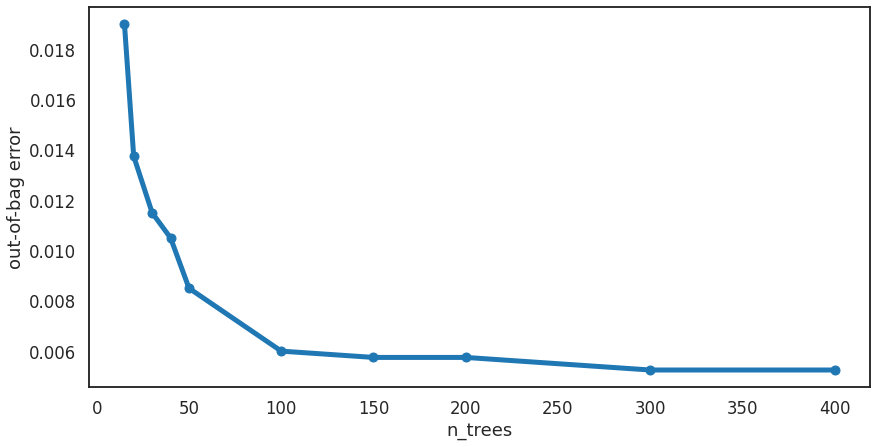

In [40]:
sns.set_context('talk')
sns.set_style('white')
ax = rf_oob_df.plot(legend=False, marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

With the help of above graph we can say that random forest with 100 trees is satisfactory of estimating results.

In [41]:
# Random forest with 100 estimators
model = RF.set_params(n_estimators=100)
y_pred = model.predict(X_test)
print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))
print(accuracy_score(Y_test,y_pred))

[[  5   0   0   0   0   0   0   0   0   0]
 [  0 112   0   0   0   0   0   1   0   0]
 [  0   0  68   0   0   0   0   0   0   0]
 [  0   0   1 100   0   0   0   0   0   0]
 [  0   0   0   0   5   0   0   0   0   0]
 [  0   0   0   1   0 123   0   0   0   0]
 [  0   0   0   1   0   0 319   0   0   0]
 [  0   0   0   0   0   0   1  26   0   0]
 [  1   0   0   0   0   0   0   0 219   0]
 [  0   0   0   1   0   0   0   0   0  16]]
                        precision    recall  f1-score   support

   Tap Changer Failure       0.83      1.00      0.91         5
       bushing failure       1.00      0.99      1.00       113
    climatic condition       0.99      1.00      0.99        68
          core failure       0.97      0.99      0.98       101
        exess moisture       1.00      1.00      1.00         5
insulation degradation       1.00      0.99      1.00       124
                    no       1.00      1.00      1.00       320
           overloading       0.96      0.96      0.96   

Lets get confusion matrix with Visually understandable way.

In [ ]:
!pip install "ansicolors==1.1.8"

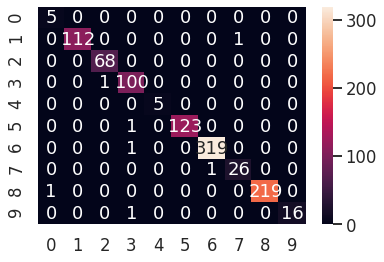

In [54]:
import colors
sns.set_context('talk')
cm = confusion_matrix(Y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='d')

Lets check the model with Unknown tripping cause dataset check the predictions.

In [ ]:
from google.colab import files
uploaded = files.upload()

In [58]:
import io
df_uk = pd.read_csv(io.BytesIO(uploaded['Unknown_tripcause.csv']))
df_uk.head()

input_voltage_volt  age  ...  tripping  tripping_cause
0                 208   16  ...        no             NaN
1                 197   17  ...       yes             NaN
2                 196    9  ...        no             NaN
3                 204    7  ...        no             NaN
4                 205   13  ...       yes             NaN

[5 rows x 14 columns]

In [59]:
df_uk = df_uk.drop(['tripping'],axis=1)
# Do the one hot encoding
df_uk1 = pd.get_dummies(df_uk["climatic_factor"])
df_uk1.rename(columns={'no':'climatic_factor_no', 'yes':'climatic_factor_yes'}, inplace=True)
# merge data frame "df_uk" and "df_uk11"
df_uk = pd.concat([df_uk, df_uk1], axis=1)
# drop original column "climmatic_factor" from "df"
df_uk.drop("climatic_factor", axis = 1, inplace=True)
print('Shape of unknown tripping cause dataset',df_uk.shape)
df_uk.head()

Shape of unknown tripping cause dataset (15, 14)


input_voltage_volt  age  ...  climatic_factor_no  climatic_factor_yes
0                 208   16  ...                   1                    0
1                 197   17  ...                   1                    0
2                 196    9  ...                   1                    0
3                 204    7  ...                   1                    0
4                 205   13  ...                   1                    0

[5 rows x 14 columns]

In [60]:
df_uk.shape

(15, 14)

In [62]:
#train test split and prediction of tripping cause
X_uk = df_uk.drop(['tripping_cause'],axis=1)
Y_uk = df_uk["tripping_cause"]
y_uk_pred = model.predict(X_uk)
print(y_uk_pred)

['no' 'tank failure' 'no' 'no' 'core failure' 'tank failure'
 'core failure' 'no' 'no' 'no' 'no' 'no' 'climatic condition'
 'climatic condition' 'no']


###<b>Results</b>

| Model Name | Accuracy Score |
| ----------------------- | -------------- |
| Support vector machine  |  88.8%         |
| Decision Tree           |  98.8%         |
| Bagging                 |  98.5%         |
| Random Forest           |  99.2%         |
| Gradient Boosting       |  99.2%         |
| Random Forest(100 trees)|  99.3%         | 
| Voting classifier       |  99.2%         |

After modeling different classifiers we can say that random forest classifier gave us the best results but we further went ahead and fitted the model with different n trees and came to conclusion that Random Forest with 100 trees of accuracy score 99.3% gives the best results and can be used for further process.

We also tested the model with an unknown tripping cause data set with the same set of features and predicted the tripping causes.

###<b>Conclusion</b>
<p>We can conclude that our model can be used for predicting the tripping causes of transformer with relevant variables.</p>
<p>Please note the data might change from company to company so we need to make few change when considering this model for future use according to the requirement.</p>